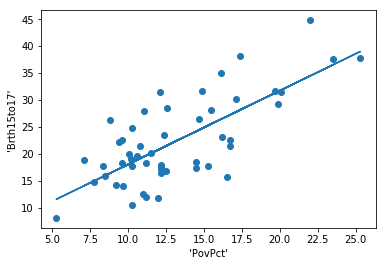

Let variable y to be Brth15to17 and x be PovPct 
 then the solution to the linear regression is the following equation 
 y = 1.3733453886953946 x + 4.267292842407471

 Let variable y to be Brth15to17, x be PovPct and z = ViolCrime 
 then the solution to the linear regression is the following equation 
 y = 1.0364996686653427 x + 0.34420732377088736 z + 5.982201328632726


<Figure size 432x288 with 0 Axes>

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pylab
from matplotlib import pyplot as plt

def load_file(file):
    '''
    The function - load_file(file) where file is the csv file containing data for several independent variable. \
    The function returns df (table containing data) and cols (headin gof each columns)
    '''
    df = pd.read_csv(file, delim_whitespace=True)
    cols = list(df.columns.values)
    return df, cols

df,cols = load_file('poverty.txt')
length = len(df['PovPct'])
#placeholder for the matrix A for the linear regression
A_plcholder = tf.placeholder(tf.float64, shape=(length,), name='input')


feed_dict = {A_plcholder: df['PovPct']}
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    output1 = sess.run(A_plcholder, feed_dict=feed_dict)
#add a column of ones to account for bias term
A = np.column_stack((output1, [1 for i in range(length)]))

b = tf.placeholder(tf.float64, shape=(length,), name='input')
At = tf.matrix_transpose(A)
AtA_inv = tf.matrix_inverse(tf.matmul(At,A))
#solution of the linear regression in normal equation
x_plc = tf.matmul(AtA_inv,tf.matmul(At,tf.expand_dims(b,axis=1)))
feed_dict1 = {b: df['Brth15to17']}
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    x = sess.run(x_plc, feed_dict=feed_dict1)
#print(x)
    
scatterx = list(df['PovPct'])
scattery = list(df['Brth15to17'])
plt.scatter(scatterx,scattery,)
ploty = x[0]*scatterx + x[1]
plt.plot(scatterx,ploty)
plt.xlabel('\'PovPct\'')
plt.ylabel('\'Brth15to17\'')
plt.show()
pylab.savefig('plot1_qn1.png')

#report the solution
print('Let variable y to be Brth15to17 and x be PovPct \n \
then the solution to the linear regression is the following equation \n \
y = {} x + {}'.format(float(x[0]),float(x[1])))

#feed in another column of data
feed_dict2 = {A_plcholder: df['ViolCrime']}
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    output2 = sess.run(A_plcholder, feed_dict=feed_dict2)
A = np.column_stack((output1, output2, [1 for i in range(length)]))
At = tf.matrix_transpose(A)
AtA_inv = tf.matrix_inverse(tf.matmul(At,A))
#solution of the linear regression in normal equation
x_plc = tf.matmul(AtA_inv,tf.matmul(At,tf.expand_dims(b,axis=1)))
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    x = sess.run(x_plc, feed_dict=feed_dict1)
#print(x)

#report the solution for linear regression
print('\n Let variable y to be Brth15to17, x be PovPct and z = ViolCrime \n \
then the solution to the linear regression is the following equation \n \
y = {} x + {} z + {}'.format(float(x[0]),float(x[1]),float(x[2])))
